In [2]:
# Import packages
import glob
import numpy as np
import pandas as pd
from PIL import Image

The dataset I am using here for the flower recognition task contains 2500 flower images. Data is collected using  bing image downloader.

The images are divided into five classes: chamomile, tulip, rose, sunflower, dandelion. For each class, there are approximately 500 photos. The photos are not in high resolution, approximately 320×240 pixels. Photos are not reduced to one size, they have different proportions.

Now let’s import the necessary Python libraries to get started with the task of Flower Recognition with Python:


In [3]:
# Install Bing image downloader
!pip install bing-image-downloader

In [4]:
# Import bing-image-downloader
from bing_image_downloader import downloader
# Download images
#chamomile, tulip, rose, sunflower, dandelion
downloader.download("chamomile", limit=500, output_dir="dataset_path")
downloader.download("tulip", limit=500, output_dir="dataset_path")
downloader.download("rose", limit=500, output_dir="dataset_path")
downloader.download("dandelion", limit=500, output_dir="dataset_path")
downloader.download("sunflowere", limit=500, output_dir="dataset_path")


Streaming output truncated to the last 5000 lines.

[%] Downloading Image #492 from https://img.crocdn.co.uk/images/products2/pl/20/00/01/74/pl2000017465.jpg?width=940&amp;height=940
[%] File Downloaded !

[%] Downloading Image #493 from https://www.longisland.com/site_media/images/article/1-Camps.jpg
[%] File Downloaded !

[%] Downloading Image #494 from https://rickholliday.files.wordpress.com/2012/08/tulip-and-daffodil.jpg
[%] File Downloaded !

[%] Downloading Image #495 from https://cdn.shopify.com/s/files/1/1902/7917/products/Tulip-Orange-Princess-8_x2000_crop_center.jpg?v=1508828911
[%] File Downloaded !

[%] Downloading Image #496 from https://pixfeeds.com/images/flowers/tulips/1280-155373443-tulip.jpg
[%] File Downloaded !

[%] Downloading Image #497 from https://bethwalshphotography.files.wordpress.com/2013/06/single-yellow-rose-tulip-1.jpg
[%] File Downloaded !

[%] Downloading Image #498 from https://www.vanengelen.com/media/catalog/product/cache/1/thumbnail/0dc2d03fe217f8c

In [5]:
#Importing libraries
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [6]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = 'dataset_path'

read each image in the data and create a label for each with the name of the folder:

In [7]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

let’s convert the data into numerical values:

In [8]:
#converting data into array
data_arr = np.array(data)
label_arr = np.array(label)


use the Label encoder and normalize the data:

In [9]:
#encoding
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [10]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

 next step is to split the dataset into 80% training and 20% test sets:

 build a neural network model for the task of Flower Recognition:

In [11]:
#model buidling
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

Before compiling the model we need to create more training images to prevent overfitting:


In [12]:

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

compile the neural network model:

In [13]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
58/58 [==============================] - 16s 143ms/step - loss: 1.5499 - accuracy: 0.2918 - val_loss: 1.1614 - val_accuracy: 0.5216
Epoch 2/64
58/58 [==============================] - 8s 131ms/step - loss: 1.2179 - accuracy: 0.5004 - val_loss: 0.9665 - val_accuracy: 0.6212
Epoch 3/64
58/58 [==============================] - 7s 128ms/step - loss: 1.0479 - accuracy: 0.5940 - val_loss: 0.8115 - val_accuracy: 0.6926
Epoch 4/64
58/58 [==============================] - 8s 129ms/step - loss: 0.9463 - accuracy: 0.6321 - val_loss: 0.7551 - val_accuracy: 0.7381
Epoch 5/64
58/58 [==============================] - 8s 129ms/step - loss: 0.8460 - accuracy: 0.6785 - val_loss: 0.7391 - val_accuracy: 0.7294
Epoch 6/64
58/58 [==============================] - 8s 130ms/step - loss: 0.7747 - accuracy: 0.7153 - val_loss: 0.6885 - val_accuracy: 0.7468
Epoch 7/64
58/58 [==============================] - 8s 129ms/step - loss: 0.8093 - accuracy: 0.6822 - val_loss: 0.7117 - val_accuracy: 0.7554
Epoch

let’s test the model if it recognize flowers properly:

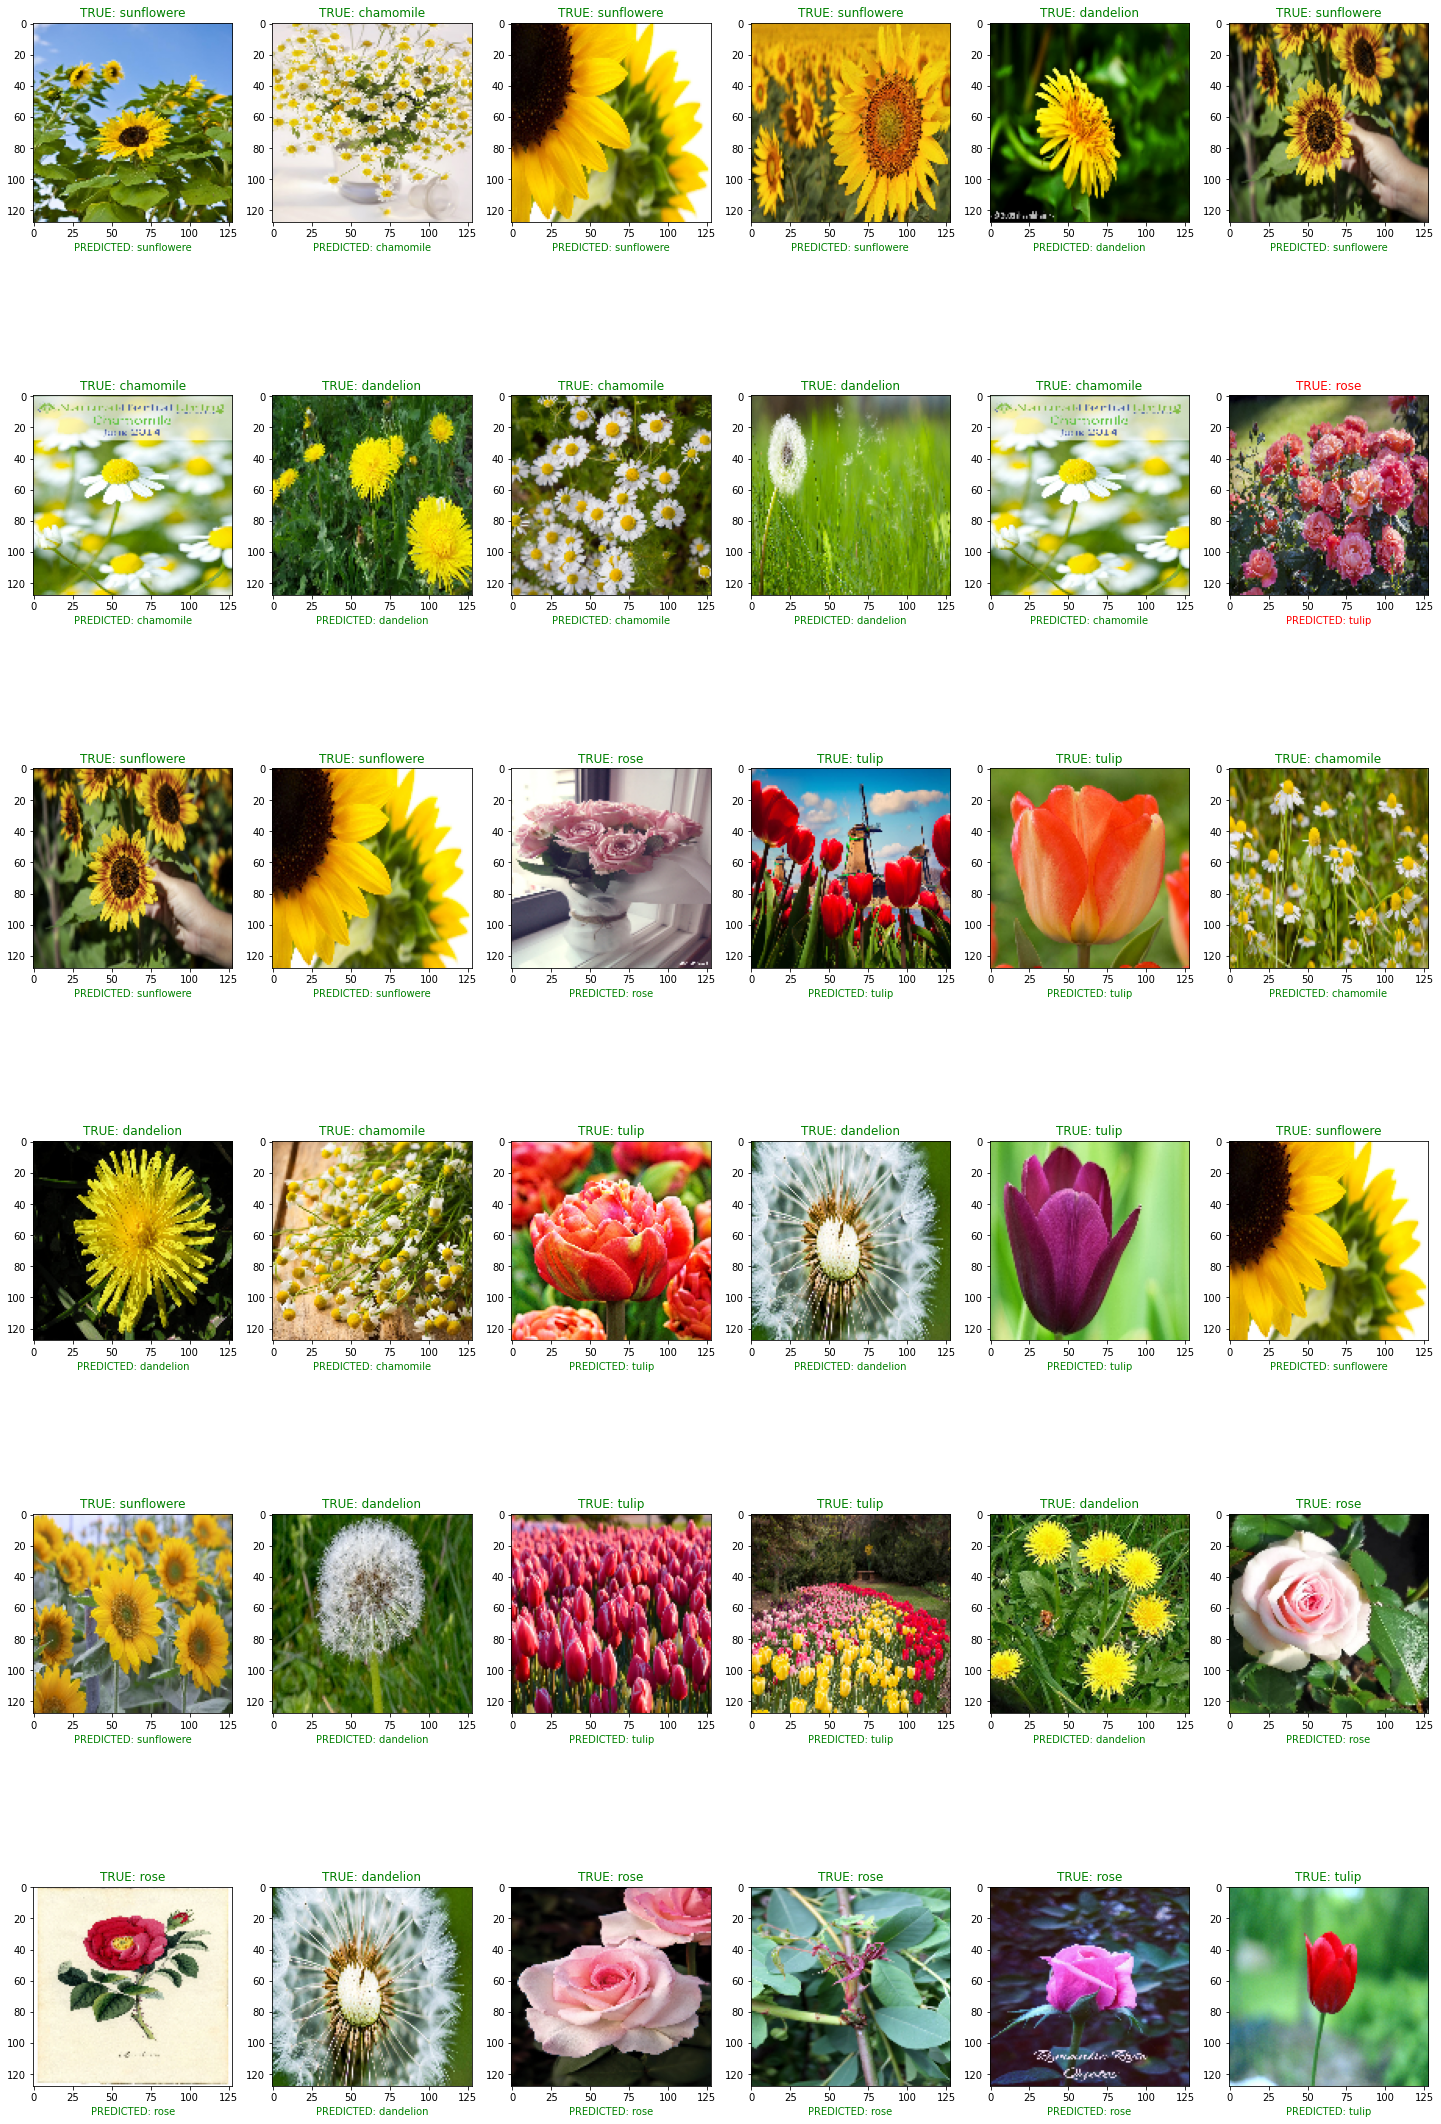

In [14]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

Model predicted most of the flowers correctly

